In [1]:
# 可视化matplotlib,seaborn
# 科学计算包numpy,pandas

import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
lianjia_df = pd.read_csv('lianjia.csv')
lianjia_df

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
23672,南北,广渠门,NaN,16,保利蔷薇,101102296423,2室1厅,1010.0,东城,简装,97.0,2008
23673,南北,永定门,NaN,6,郭庄北里,101102593534,2室1厅,468.0,东城,简装,66.0,1995
23674,南北,和平里,NaN,6,康鸿家园,101102549465,3室2厅,1400.0,东城,简装,155.0,2000
23675,南北,前门,NaN,6,台基厂头条10号院,101102322422,4室1厅,1100.0,东城,简装,107.0,1990


In [3]:
display(lianjia_df.head(n=2))  # display  显示   n=2 显示两行和head(2)一样

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [4]:
lianjia_df.head(2)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [5]:
# 检查缺失值情况   info()
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Direction   23677 non-null  object 
 1   District    23677 non-null  object 
 2   Elevator    15440 non-null  object 
 3   Floor       23677 non-null  int64  
 4   Garden      23677 non-null  object 
 5   Id          23677 non-null  int64  
 6   Layout      23677 non-null  object 
 7   Price       23677 non-null  float64
 8   Region      23677 non-null  object 
 9   Renovation  23677 non-null  object 
 10  Size        23677 non-null  float64
 11  Year        23677 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [6]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [7]:
# 拷贝数据值
df = lianjia_df.copy()
# 添加新特性  房屋的均价    round保留几位小数
df['average_price'] = (lianjia_df['Price']/lianjia_df['Size']).round(2)
df['average_price']

0        10.40
1        11.75
2         6.67
3        10.77
4        11.09
         ...  
23672    10.41
23673     7.09
23674     9.03
23675    10.28
23676     9.75
Name: average_price, Length: 23677, dtype: float64

In [8]:
# 重新摆放列位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'average_price', 'Price']
df = pd.DataFrame(df, columns = columns)
df

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,average_price,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.67,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.77,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.09,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23672,东城,广渠门,保利蔷薇,2室1厅,16,2008,97.0,NaN,南北,简装,10.41,1010.0
23673,东城,永定门,郭庄北里,2室1厅,6,1995,66.0,NaN,南北,简装,7.09,468.0
23674,东城,和平里,康鸿家园,3室2厅,6,2000,155.0,NaN,南北,简装,9.03,1400.0
23675,东城,前门,台基厂头条10号院,4室1厅,6,1990,107.0,NaN,南北,简装,10.28,1100.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotl

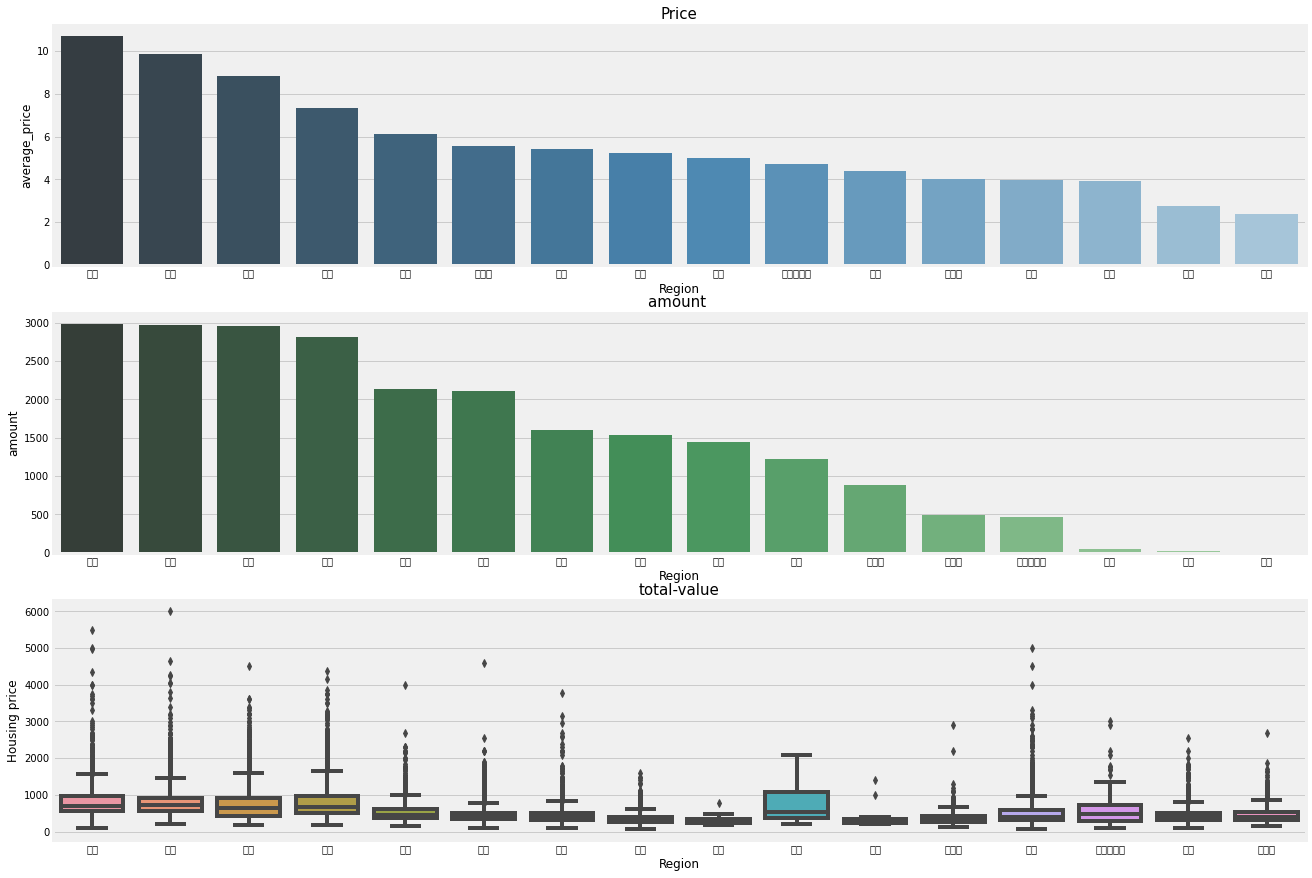

In [9]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['average_price'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='Region', y='average_price', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('Price',fontsize=15)
ax1.set_xlabel('Region')
ax1.set_ylabel('average_price')

sns.barplot(x='Region', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('amount ',fontsize=15)
ax2.set_xlabel('Region')
ax2.set_ylabel('amount')

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('total-value',fontsize=15)
ax3.set_xlabel('Region')
ax3.set_ylabel('Housing price')

#barplot（条形图）countplot（计数图）piontplot（点图）
plt.show()

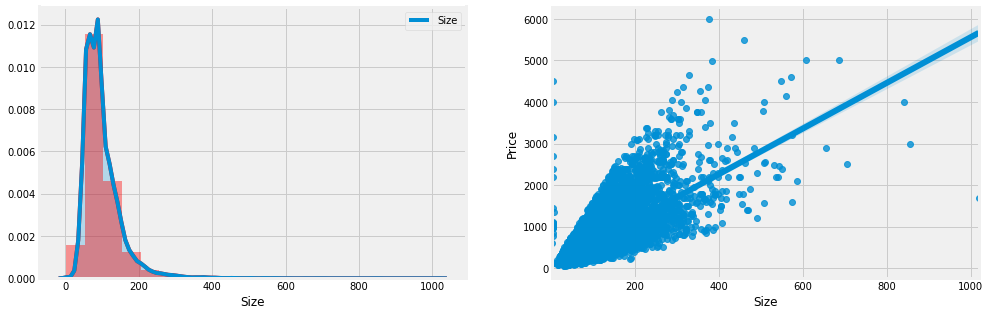

In [10]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 建房时间的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# 建房时间和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

In [11]:
df.loc[df['Size']< 10]


,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,average_price,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.00,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.00,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.00,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.00,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.00,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.00,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.33,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.50,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.00,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.00,2700.0


In [12]:
df.loc[df['Size']>1000]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,average_price,Price
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.67,1700.0


In [13]:
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

In [14]:
df

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,average_price,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.67,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.77,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.09,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23672,东城,广渠门,保利蔷薇,2室1厅,16,2008,97.0,NaN,南北,简装,10.41,1010.0
23673,东城,永定门,郭庄北里,2室1厅,6,1995,66.0,NaN,南北,简装,7.09,468.0
23674,东城,和平里,康鸿家园,3室2厅,6,2000,155.0,NaN,南北,简装,9.03,1400.0
23675,东城,前门,台基厂头条10号院,4室1厅,6,1990,107.0,NaN,南北,简装,10.28,1100.0


/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufe

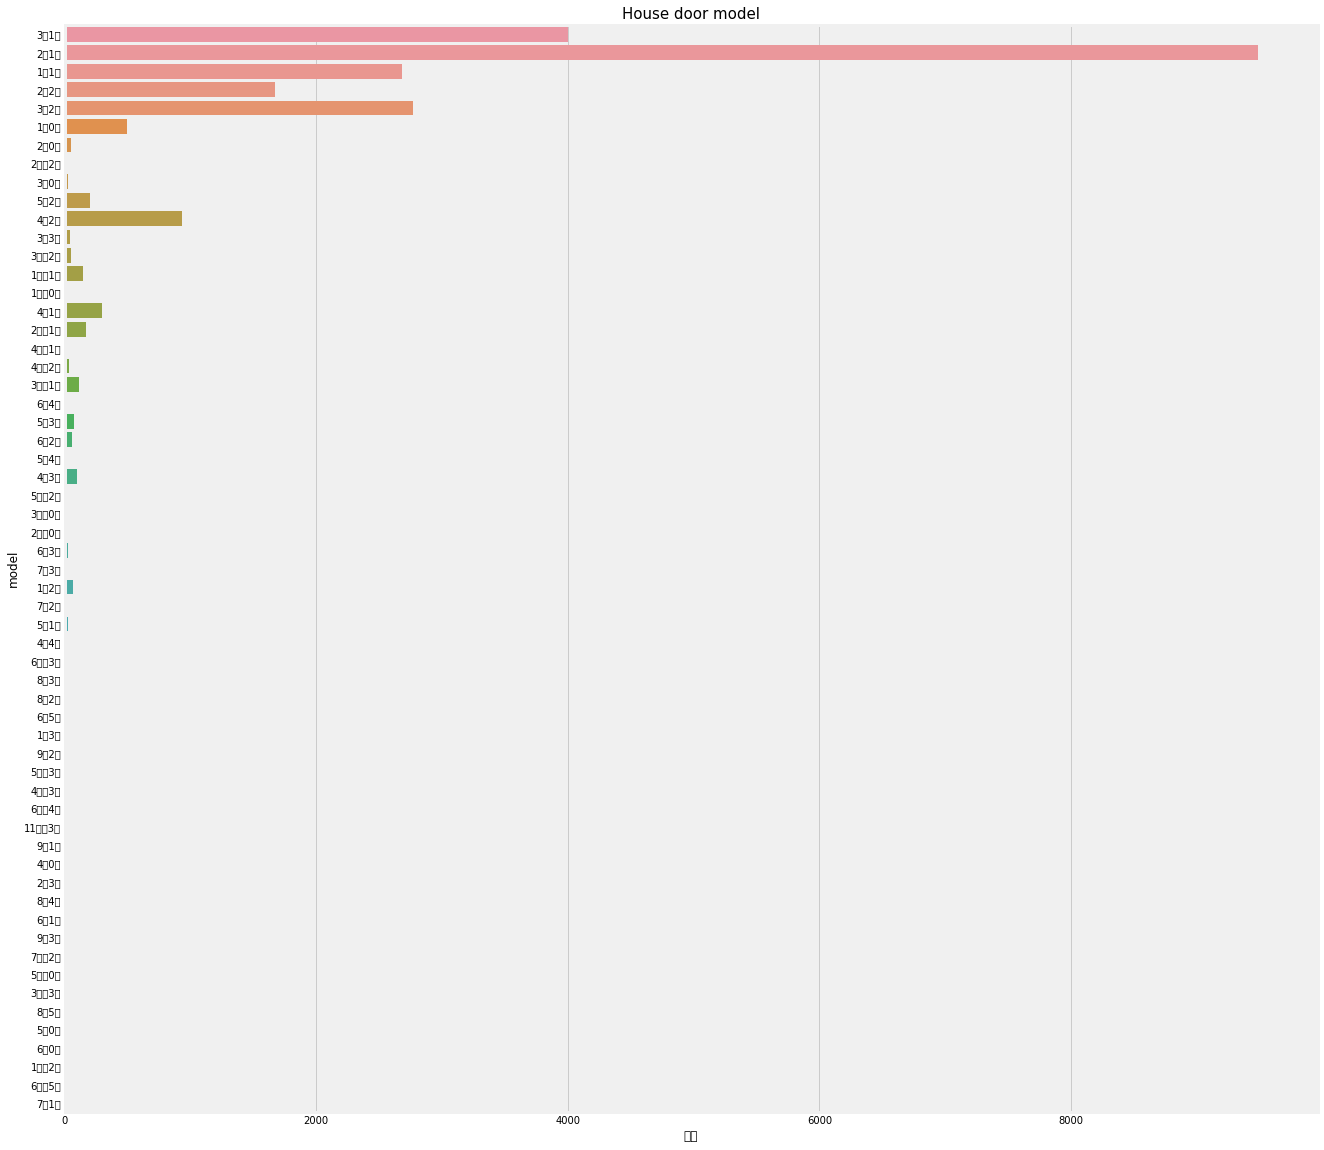

In [15]:
f, ax1= plt.subplots(figsize=(20,20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('House door model',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('model')
plt.show()

# 箱线图boxplot
# 小提琴图violinplot
# 散点图striplot
# 带分布的散点图swarmplot
# 直方图barplot
# 计数的直方图countplot


In [16]:
# Renovation 特征分析
df['Renovation'].value_counts()

精装    11345
简装     8496
其他     3239
毛坯      576
Name: Renovation, dtype: int64

In [17]:
df['Renovation'] = df.loc[(df['Renovation'] != '南北'), 'Renovation']
df['Renovation'] 

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        精装
1        精装
2        其他
3        精装
4        精装
         ..
23672    简装
23673    简装
23674    简装
23675    简装
23676    精装
Name: Renovation, Length: 23656, dtype: object

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufe

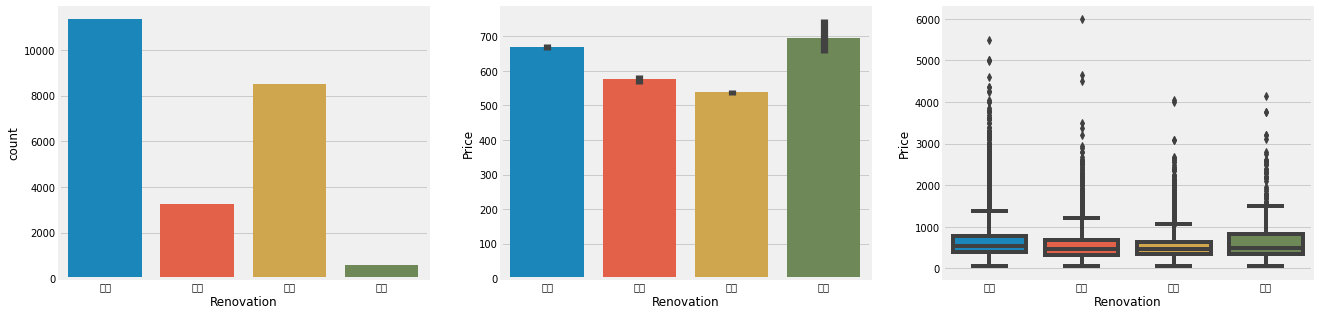

In [18]:
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

In [22]:
#Elevator 特征分析
misn = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print('Elevator缺失值数量为：'+ str(misn))

Elevator缺失值数量为：8237


In [21]:
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']
df

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,average_price,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.67,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.77,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.09,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23672,东城,广渠门,保利蔷薇,2室1厅,16,2008,97.0,NaN,南北,简装,10.41,1010.0
23673,东城,永定门,郭庄北里,2室1厅,6,1995,66.0,NaN,南北,简装,7.09,468.0
23674,东城,和平里,康鸿家园,3室2厅,6,2000,155.0,NaN,南北,简装,9.03,1400.0
23675,东城,前门,台基厂头条10号院,4室1厅,6,1990,107.0,NaN,南北,简装,10.28,1100.0


In [26]:
# 填补Elevator缺失值
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator'] = '无电梯'
df

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,average_price,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,无电梯,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.67,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,有电梯,南,精装,10.77,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.09,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23672,东城,广渠门,保利蔷薇,2室1厅,16,2008,97.0,有电梯,南北,简装,10.41,1010.0
23673,东城,永定门,郭庄北里,2室1厅,6,1995,66.0,无电梯,南北,简装,7.09,468.0
23674,东城,和平里,康鸿家园,3室2厅,6,2000,155.0,无电梯,南北,简装,9.03,1400.0
23675,东城,前门,台基厂头条10号院,4室1厅,6,1990,107.0,无电梯,南北,简装,10.28,1100.0


In [29]:
misn = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print('Elevator缺失值数量为：'+ str(misn))

Elevator缺失值数量为：0


/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30005 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26799 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufe

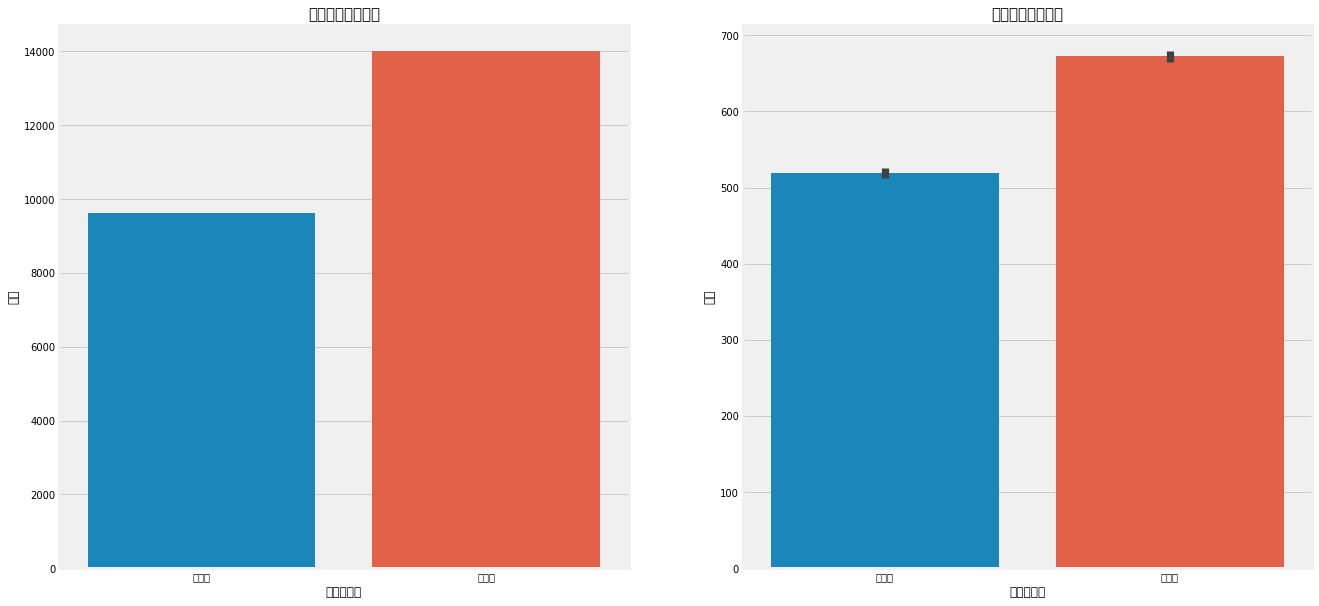

In [30]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator', y='Price', data=df, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31934 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.vir

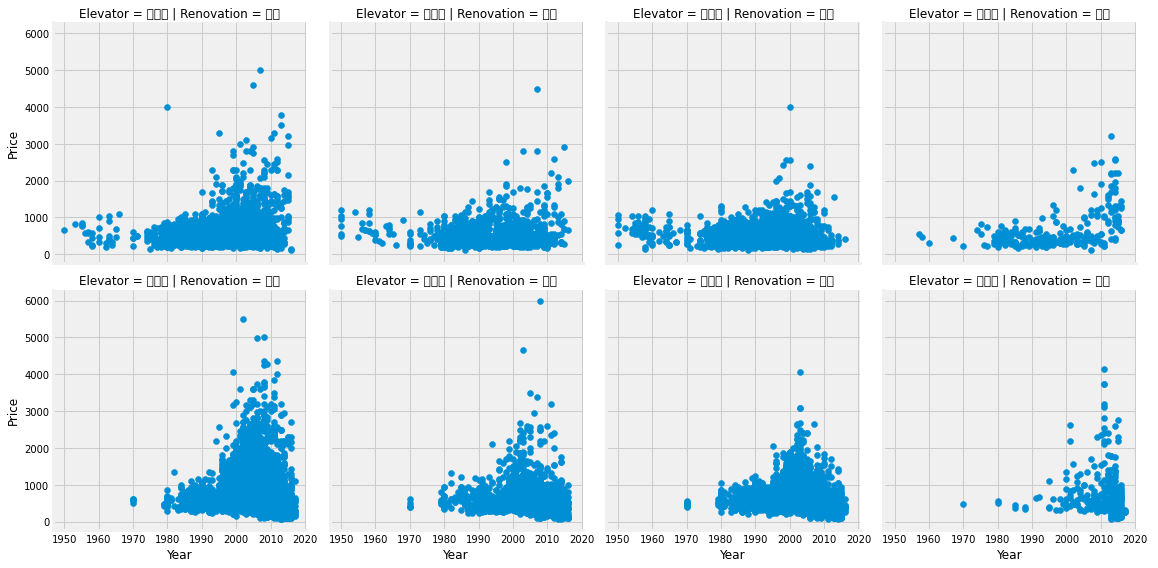

In [31]:
#Year 特征分析
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25143 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/lxc/.virtualenvs/shujufenxi/

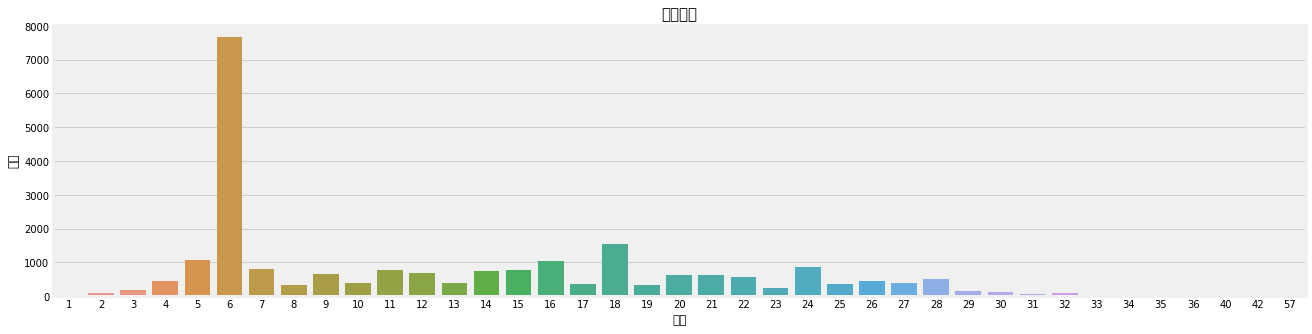

In [33]:
#Floor 特征分析
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()